## Segmentação de Cliente Baseado em Comportamento

### Descrição do conjunto de dados:

#### Objetivo: Agrupar clientes em segmentos distintos com base em seus comportamentos de compra.

O conjunto de dados representa dados transacionais de varejo. Ele contém informações sobre clientes, suas compras, produtos e detalhes da transação. Os dados incluem vários atributos, como 
- ID do cliente, 
- nome, 
- e-mail, 
- telefone, 
- endereço, 
- cidade, 
- estado, 
- CEP, 
- país, 
- idade, 
- sexo, 
- renda, 
- segmento de cliente, 
- data da última compra, 
- total de compras, 
- valor gasto, 
- categoria do produto, 
- marca do produto, 
- tipo de produto, 
- feedback, 
- método de envio, 
- método de pagamento,
- status do pedido.

##### Importação de Pacotes

In [150]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

#### Importação e pré-visualização dos dados, com arquivo CSV

In [239]:
#Importação e pré-visualização dos dados, com arquivo CSV
base = pd.read_csv("C:/Users/menez/OneDrive - Faculdade Impacta Tecnologia/IMPACTA 2024/ANO LETIVO 2024/MATÉRIAS/REAL DATA - DRIVEN BUSINESS PROJECT (HANDS-ON)/ecommerce/archive/new_retail_data.csv")
print(base.head())

   Transaction_ID  Customer_ID                 Name                Email  \
0      8691788.00     37249.00  Michelle Harrington    Ebony39@gmail.com   
1      2174773.00     69749.00          Kelsey Hill     Mark36@gmail.com   
2      6679610.00     30192.00         Scott Jensen    Shane85@gmail.com   
3      7232460.00     62101.00        Joseph Miller     Mary34@gmail.com   
4      4983775.00     27901.00        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0 1414786801.00            3959 Amanda Burgs    Dortmund           Berlin   
1 6852899987.00           82072 Dawn Centers  Nottingham          England   
2 8362160449.00            4133 Young Canyon     Geelong  New South Wales   
3 2776751724.00  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4 9098267635.00    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country   Age  Gender Income Customer_Segment        Date  \
0 779

#### Tamanho do conjunto de dados

In [240]:
#Tamanho do conjunto de dados
base.shape

(302010, 30)

#### Registros Top 5

In [241]:
#Registros Top 5
base.head(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.00,37249.00,Michelle Harrington,Ebony39@gmail.com,1414786801.00,3959 Amanda Burgs,Dortmund,Berlin,77985.00,Germany,21.00,Male,Low,Regular,9/18/2023,2023.00,September,22:03:55,3.00,108.03,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.00,Cycling shorts
1,2174773.00,69749.00,Kelsey Hill,Mark36@gmail.com,6852899987.00,82072 Dawn Centers,Nottingham,England,99071.00,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8:42:04,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab
2,6679610.00,30192.00,Scott Jensen,Shane85@gmail.com,8362160449.00,4133 Young Canyon,Geelong,New South Wales,75929.00,Australia,48.00,Male,Low,Regular,4/26/2023,2023.00,April,4:06:29,3.00,354.48,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.00,Sports equipment
3,7232460.00,62101.00,Joseph Miller,Mary34@gmail.com,2776751724.00,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.00,Canada,56.00,Male,High,Premium,5/8/2023,2023.00,May,14:55:17,7.00,352.41,2466.85,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.00,Utility knife
4,4983775.00,27901.00,Debra Coleman,Charles30@gmail.com,9098267635.00,5813 Lori Ports Suite 269,Bristol,England,48704.00,UK,22.00,Male,Low,Premium,1/10/2024,2024.00,January,16:54:07,2.00,124.28,248.55,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.00,Chocolate cookies


### Verificação de dados nulos para avaliar exclusão ou subistituição

In [60]:
#Verificação de dados nulos para avaliar exclusão ou subistituição
base.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

### Identificando o tipo do produto

In [61]:
#Identifica o tipo do produto
base.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

##### Convertendo o typo de dados da coluna Data de object para datetime
##### Conferindo o tipo de dado Data após a alteração
##### Excluindo os valores nulos de Data


In [62]:
# Convertendo o typo de dados da coluna Data de object para datetime
base['Date'] = pd.to_datetime(base['Date'])

#Conferindo o tipo de dado Data após a alteração
print(base['Date'].dtype)

# Excluindo os valores nulos de Data
base = base.dropna(subset=['Date'])

datetime64[ns]


### Conferindo se os valores nulos da coluna Data foi excluido

In [63]:
#Conferindo se os valores nulos da coluna Data foi excluido
base.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                381
Email               347
Phone               362
Address             314
City                248
State               279
Zipcode             339
Country             271
Age                 172
Gender              317
Income              290
Customer_Segment    215
Date                  0
Year                350
Month               272
Time                349
Total_Purchases     361
Amount              356
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      296
Order_Status        234
Ratings             184
products              0
dtype: int64

### Periodo da Base de dados

Podemos verificar pelo resultado o periodo em que os dados foram coletados, de 01-03-2023 até 29-02-2024, 1 ano

In [64]:
# Avaliar o período dos dados coletados
inicio = pd.to_datetime(base['Date']).dt.date.min()
fim = pd.to_datetime(base['Date']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2023-03-01 Até: 2024-02-29


### Análisamos a quantidade de valores unicos em cada coluna

In [65]:
# Análisamos a quantidade de valores unicos em cada coluna
valores_unicos = []
for i in base.columns[0:20].tolist():
    print(i, ':', len(base[i].astype(str).value_counts()))
    valores_unicos.append(len(base[i].astype(str).value_counts()))

Transaction_ID : 294118
Customer_ID : 86754
Name : 159258
Email : 52882
Phone : 298939
Address : 298974
City : 131
State : 55
Zipcode : 93960
Country : 6
Age : 54
Gender : 3
Income : 4
Customer_Segment : 4
Date : 366
Year : 3
Month : 13
Time : 83667
Total_Purchases : 11
Amount : 298942


In [66]:
# Visualizando algumas medidas estatisticas
base.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Date,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,301318.00,301343.00,301289.00,301312.00,301479.00,301651,301301.00,301290.00,301295.00,301301.00,301467.00
mean,5495772.14,55010.22,5501352644.31,50299.48,35.48,2023-08-30 16:17:07.497339392,2023.17,5.36,255.18,1367.77,3.16
min,1000007.00,10000.00,1000049414.00,501.00,18.00,2023-03-01 00:00:00,2023.00,1.00,10.00,10.00,1.00
25%,3247781.50,32472.50,3255177925.00,25426.00,22.00,2023-05-31 00:00:00,2023.00,3.00,132.92,438.89,2.00
50%,5499516.50,55016.00,5505628649.00,50605.00,32.00,2023-08-31 00:00:00,2023.00,5.00,255.49,1041.23,3.00
75%,7739532.25,77512.00,7749691148.00,75250.25,46.00,2023-11-30 00:00:00,2023.00,8.00,377.67,2030.17,4.00
max,9999995.00,99999.00,9999996122.00,99949.00,70.00,2024-02-29 00:00:00,2024.00,10.00,500.00,4999.63,5.00
std,2595688.89,26005.50,2595923627.04,28972.34,15.02,NaN,0.37,2.87,141.39,1128.95,1.32


### Produto Mais caro e mais barato

In [67]:
#Produto Mais caro e mais barato
print('Maior Valor Transação:', base['Amount'].max())
print('Menor Valor Transação:', base['Amount'].min())

Maior Valor Transação: 499.997911
Menor Valor Transação: 10.00021923


### Maior venda e menor venda

In [68]:
#Maior venda e menor venda
print('Maior Valor Transação:', base['Total_Amount'].max())
print('Menor Valor Transação:', base['Total_Amount'].min())

Maior Valor Transação: 4999.625796
Menor Valor Transação: 10.00374959


### Analisando varáveis Genero

- 62,16 % São Mulheres
- 37,84 % Homens

In [69]:
#Analisando varáveis Genero
base.groupby(['Gender']).size()

Gender
Female    113953
Male      187381
dtype: int64

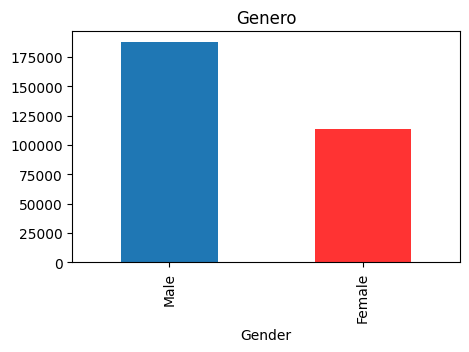

In [70]:
#Analisando varáveis Genero
plt.figure(figsize=(5, 3))
base.Gender.value_counts().plot(kind='bar', title='Genero',color = ['#1F77B4', '#FF3333']);

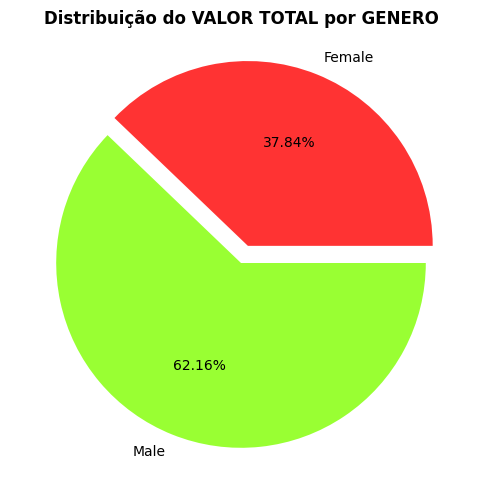

In [71]:
#Analisando Genero
color = ['#FF3333', '#99FF33']
explode = (0.1, 0)

plt.figure(figsize=(10, 6))
base.groupby('Gender')['Total_Amount'].sum().plot(kind='pie', autopct='%0.2f%%', colors=color, explode=explode)
plt.title('Distribuição do VALOR TOTAL por GENERO' , fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()

#### Seguimentação por Idade

- Identificamos que a maioria dos clientes estão entre 20 e 30 anos seguido por 40 a 50 anos, com isso podemos indicar um trabalho de marketing para difundir as vendas principalmente para pessoas de 30 e 40 anos, pois são pessoas economicamente ativas e que são um publico em ascenção.

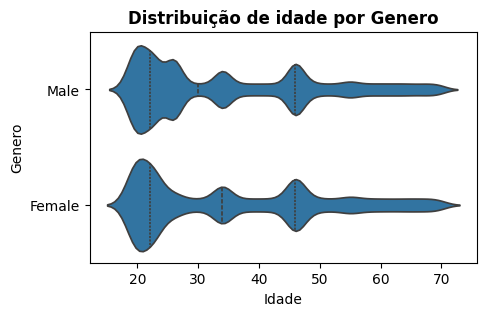

In [72]:
#Distribuição de Idade por Gênero
plt.figure(figsize=(5, 3))
sns.violinplot(data=base, x='Age', y='Gender', orient='h', inner='quart')
plt.title('Distribuição de idade por Genero', fontweight='bold')
plt.xlabel('Idade')
plt.ylabel('Genero')
plt.show()

### Seguimentação por Renda

O e-commerce seguimenta seu público por renda:

- High
- Low 
- Medium

O maior publico é de categoria média com 43,20 %, nesse caso poderiamos sugerir uma estratégia para atigir principalmente o público de porte mais alto que atualmente atinge apenas 24,82 %

In [73]:
#Analisando varáveis Renda
base.groupby(['Income']).size()

Income
High       75139
Low        96145
Medium    130077
dtype: int64

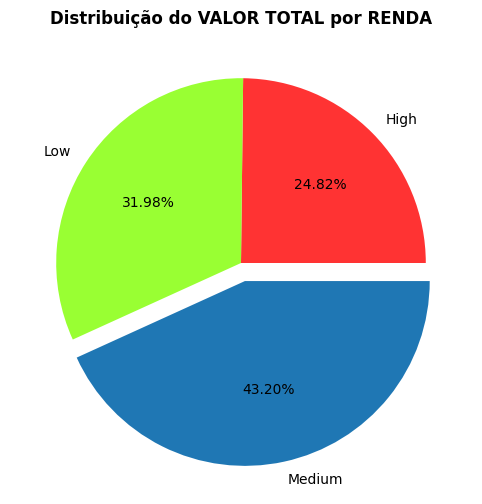

In [74]:
#Analisando varáveis Renda
color = ['#FF3333', '#99FF33', '#1F77B4']
explode = (0, 0, 0.1)

plt.figure(figsize=(10, 6))
base.groupby('Income')['Total_Amount'].sum().plot(kind='pie', autopct='%0.2f%%', colors=color, explode=explode)
plt.title('Distribuição do VALOR TOTAL por RENDA' , fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()

### Analisando de País

O e-commerce atende 5 paises

- USA
- UK
- Germany
- Autralia
- Canada

Dessa forma podemos identificar o comportamento e segmentação de cliente em cada país.

Podemos ver que USA e UK atinge mais de 50% das vendas, pode ser feito uma ação para melhorar as vendas nos países como UK e Germany para alcançar novos clientes.

30% das vendas estão na Australia e Canadã.

In [75]:
#Analisando varáveis País
base.groupby(['Country']).size()

Country
Australia    45271
Canada       45240
Germany      52770
UK           62996
USA          95103
dtype: int64

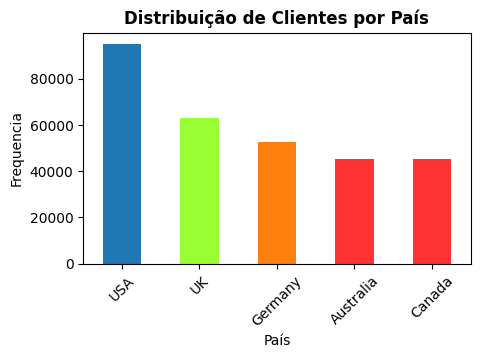

In [76]:
#Analisando varáveis País
plt.figure(figsize=(5, 3))
base['Country'].value_counts().sort_values(ascending=False).plot(kind='bar', color = ['#1F77B4', '#99FF33', '#FF7F0E', '#FF3333', '#FF3333'])
plt.title('Distribuição de Clientes por País', fontweight='bold')
plt.xlabel('País')
plt.ylabel('Frequencia')
plt.xticks(rotation=45)
plt.show()

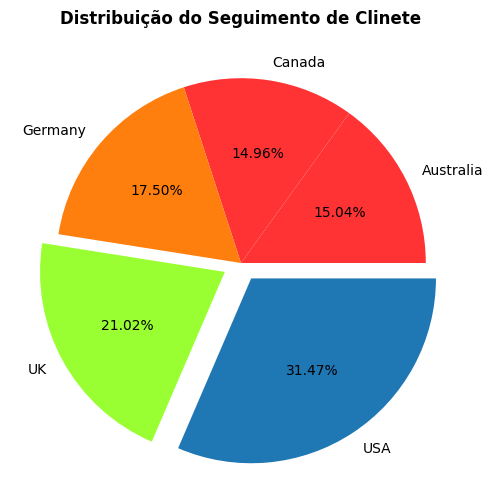

In [77]:
#Analisando varáveis Segmineto de Clinete
color = ['#FF3333', '#FF3333', '#FF7F0E', '#99FF33', '#1F77B4']
explode = (0, 0, 0, 0.1, 0.1)

plt.figure(figsize=(10, 6))
base.groupby('Country')['Total_Amount'].sum().plot(kind='pie', autopct='%0.2f%%', colors=color, explode=explode)
plt.title('Distribuição do Seguimento de Clinete' , fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()

### Analisando varáveis Segmineto de Clinete

- New
- Premium
- Regular

Poderia fazer um trabalho de Marketing para os clientes Regular e New se tornar Premium

In [78]:
#Analisando varáveis Segmineto de Clinete
base.groupby(['Customer_Segment']).size()

Customer_Segment
New         91070
Premium     64317
Regular    146049
dtype: int64

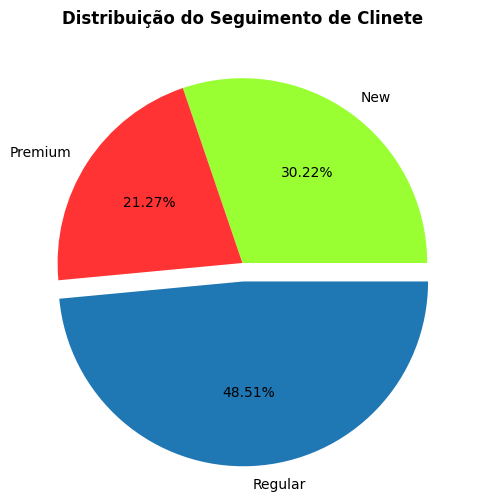

In [79]:
#Analisando varáveis Segmineto de Clinete
color = ['#99FF33', '#FF3333', '#1F77B4']
explode = (0, 0, 0.1)

plt.figure(figsize=(10, 6))
base.groupby('Customer_Segment')['Total_Amount'].sum().plot(kind='pie', autopct='%0.2f%%', colors=color, explode=explode)
plt.title('Distribuição do Seguimento de Clinete' , fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()

### Periodo da Vendas

Podemos identificar que a Base de dados é de um periodo que abrange dois anos 2023 e 2024

In [80]:
# Avaliar o período dos dados coletados
inicio = pd.to_datetime(base['Date']).dt.date.min()
fim = pd.to_datetime(base['Date']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2023-03-01 Até: 2024-02-29


In [81]:
#Analisando varáveis Ano
base.groupby(['Year']).size()

Year
2023.00    251550
2024.00     49751
dtype: int64

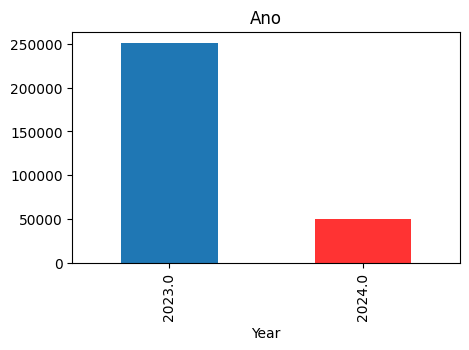

In [82]:
#Analisando varáveis Ano
plt.figure(figsize=(5, 3))
base.Year.value_counts().plot(kind='bar', title='Ano',color = ['#1F77B4', '#FF3333']);

### Analisando a variável Mês (Month) e Ano (Year)

- Com o agrupamento podemos ver quantas transações tivemos no mês e em seguida apresentamos num gráfico de barra por ordem cronológica, uma vez que a base vai de Fevereiro de 2023 a Março de 2024

- Os meses que mais tiveram vendas foram Abril, Agosto e Dezembro, seguido por Julho e Maio

In [83]:
#Analisando varáveis Mês
#Com o agrupamento podemos ver quantas transações tivemos no mês
base1 = pd.DataFrame(base.groupby(['Month']).size())
base1

,0
Month,
April,41243
August,32974
December,18923
February,18234
January,37243
July,30853
June,18362
March,19119
May,28298


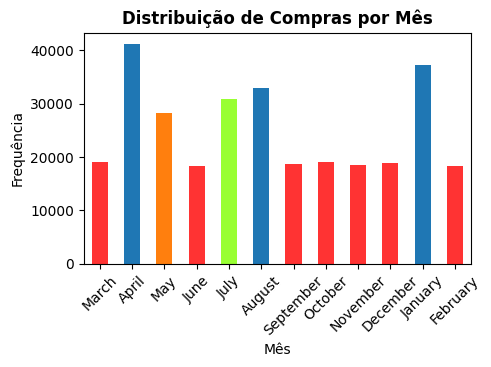

In [84]:
# Definindo a ordem dos meses
month_order = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', ]

# Convertendo a coluna 'Month' para tipo categórico com a ordem especificada
base['Month'] = pd.Categorical(base['Month'], categories=month_order, ordered=True)

# Contando os valores e ordenando-os pela ordem dos meses
month_counts = base['Month'].value_counts().sort_index()

# Plotando o gráfico
plt.figure(figsize=(5, 3))
month_counts.plot(kind='bar', color = ['#FF3333', '#1F77B4', '#FF7F0E', '#FF3333', '#99FF33', '#1F77B4', '#FF3333', '#FF3333', '#FF3333', '#FF3333', '#1F77B4'])

plt.title('Distribuição de Compras por Mês', fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

### Analisando varáveis Total de Produtos por Transação

Podemos identificar que mais de 30 mil pessoas comprarm de 1 a 5 itens por transação. E o maximo de itens vendidos por transação é 10 unidades.

In [85]:
#Analisando varáveis Total de Produtos por Transação
base.groupby(['Total_Purchases']).size()

Total_Purchases
1.00     31833
2.00     31876
3.00     31833
4.00     31535
5.00     31881
6.00     28507
7.00     28412
8.00     28673
9.00     28423
10.00    28317
dtype: int64

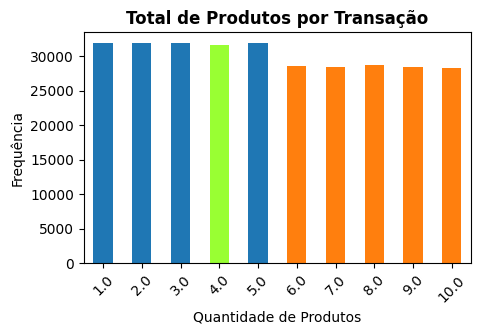

In [86]:
# Definindo a ordem dos Total_Purchases
quat_prod = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# Convertendo a coluna 'Total_Purchases' para tipo categórico com a ordem especificada
base['Total_Purchases'] = pd.Categorical(base['Total_Purchases'], categories=quat_prod, ordered=True)

# Contando os valores e ordenando-os pela ordem de quantidade de produto
Total_Purchases = base['Total_Purchases'].value_counts().sort_index()
# Contando os valores e ordenando-os pela ordem quantidade de itens
prod_counts = base['Total_Purchases'].value_counts().sort_index()

# Plotando o gráfico
plt.figure(figsize=(5, 3))
prod_counts.plot(kind='bar', color = ['#1F77B4', '#1F77B4', '#1F77B4', '#99FF33', '#1F77B4', '#FF7F0E', '#FF7F0E', '#FF7F0E', '#FF7F0E', '#FF7F0E', '#FF7F0E'])
plt.title('Total de Produtos por Transação', fontweight='bold')
plt.xlabel('Quantidade de Produtos')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

### Avaliando Feedback

Podemos identificar que o relacionamento entre clientes e e-commerce é satisfatório, pois os clienets na sua grande maioria faz um Feedback: Excellent e Good.

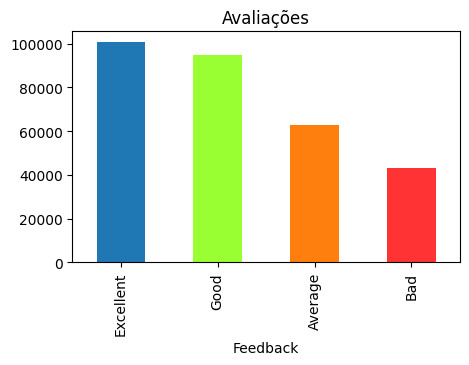

In [87]:
# Avaliando os Feddbacks dos clientes
plt.figure(figsize=(5, 3))
base.Feedback.value_counts().plot(kind='bar', title='Avaliações',color = ['#1F77B4', '#99FF33', '#FF7F0E', '#FF3333']);

O grafico abaixo representa a porcentagem das avaliações:
- Excellent 32,32%
- Good 31,45%
- Average 20,85%
- Bad 14,38%

Isso dignifica que 63,77% dos clienets estão muito <br>satisfeitos com o que compram.<br>

Porém 20,85% ainda não estão totalmente satisfeitos<br>
E o 14,38 % não estão satisfeitos<br>
Ambos somam 35,23% é uma numero que precisa ser melhorado

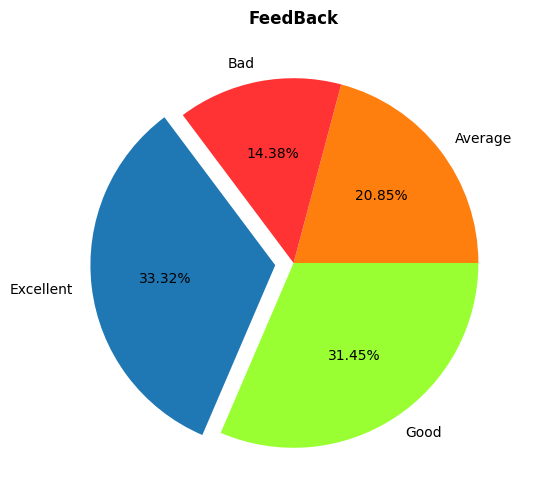

In [88]:
#Analisando FeedBack
color = ['#FF7F0E', '#FF3333', '#1F77B4', '#99FF33']
explode = (0, 0, 0.1, 0)

plt.figure(figsize=(10, 6))
base.groupby('Feedback')['Total_Amount'].sum().plot(kind='pie', autopct='%0.2f%%', colors=color, explode=explode)
plt.title('FeedBack' , fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()

#### Analise ML 

In [242]:
base.head(3)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.00,37249.00,Michelle Harrington,Ebony39@gmail.com,1414786801.00,3959 Amanda Burgs,Dortmund,Berlin,77985.00,Germany,21.00,Male,Low,Regular,9/18/2023,2023.00,September,22:03:55,3.00,108.03,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.00,Cycling shorts
1,2174773.00,69749.00,Kelsey Hill,Mark36@gmail.com,6852899987.00,82072 Dawn Centers,Nottingham,England,99071.00,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8:42:04,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab
2,6679610.00,30192.00,Scott Jensen,Shane85@gmail.com,8362160449.00,4133 Young Canyon,Geelong,New South Wales,75929.00,Australia,48.00,Male,Low,Regular,4/26/2023,2023.00,April,4:06:29,3.00,354.48,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.00,Sports equipment


In [243]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [244]:
base.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [245]:
base_inteiros = base.select_dtypes(include = ['float64', 'int64'])
base_inteiros.head()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
0,8691788.00,37249.00,1414786801.00,77985.00,21.00,2023.00,3.00,108.03,324.09,5.00
1,2174773.00,69749.00,6852899987.00,99071.00,19.00,2023.00,2.00,403.35,806.71,4.00
2,6679610.00,30192.00,8362160449.00,75929.00,48.00,2023.00,3.00,354.48,1063.43,2.00
3,7232460.00,62101.00,2776751724.00,88420.00,56.00,2023.00,7.00,352.41,2466.85,4.00
4,4983775.00,27901.00,9098267635.00,48704.00,22.00,2024.00,2.00,124.28,248.55,1.00


In [246]:
base_strings = base.select_dtypes(include = ['category', 'datetime64', 'object'])
base_strings.head()

,Name,Email,Address,City,State,Country,Gender,Income,Customer_Segment,Date,Month,Time,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,products
0,Michelle Harrington,Ebony39@gmail.com,3959 Amanda Burgs,Dortmund,Berlin,Germany,Male,Low,Regular,9/18/2023,September,22:03:55,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,Cycling shorts
1,Kelsey Hill,Mark36@gmail.com,82072 Dawn Centers,Nottingham,England,UK,Female,Low,Premium,12/31/2023,December,8:42:04,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,Lenovo Tab
2,Scott Jensen,Shane85@gmail.com,4133 Young Canyon,Geelong,New South Wales,Australia,Male,Low,Regular,4/26/2023,April,4:06:29,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,Sports equipment
3,Joseph Miller,Mary34@gmail.com,8148 Thomas Creek Suite 100,Edmonton,Ontario,Canada,Male,High,Premium,5/8/2023,May,14:55:17,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,Utility knife
4,Debra Coleman,Charles30@gmail.com,5813 Lori Ports Suite 269,Bristol,England,UK,Male,Low,Premium,1/10/2024,January,16:54:07,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,Chocolate cookies


In [154]:
base['Total_Purchases'] = base['Total_Purchases'].astype(float)

In [330]:
from sklearn.preprocessing import LabelEncoder
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
base['Name'] = lb.fit_transform(base['Name'])
base['Email'] = lb.fit_transform(base['Email'])
base['Address'] = lb.fit_transform(base['Address'])
base['City'] = lb.fit_transform(base['City'])
base['State'] = lb.fit_transform(base['State'])
base['Country'] = lb.fit_transform(base['Country'])
base['Gender'] = lb.fit_transform(base['Gender'])
base['Income'] = lb.fit_transform(base['Income'])
base['Customer_Segment'] = lb.fit_transform(base['Customer_Segment'])
base['Date'] = lb.fit_transform(base['Date'])
base['Month'] = lb.fit_transform(base['Month'])
base['Time'] = lb.fit_transform(base['Time'])
base['Product_Category'] = lb.fit_transform(base['Product_Category'])
base['Product_Brand'] = lb.fit_transform(base['Product_Brand'])
base['Product_Type'] = lb.fit_transform(base['Product_Type'])
base['Shipping_Method'] = lb.fit_transform(base['Shipping_Method'])
base['Payment_Method'] = lb.fit_transform(base['Payment_Method'])
base['Order_Status'] = lb.fit_transform(base['Order_Status'])
base['products'] = lb.fit_transform(base['products'])
base['Feedback'] = lb.fit_transform(base['Feedback'])

In [337]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamado de valores missing ou NAN (Not Available)
base.isnull().sum()

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

In [336]:
base.fillna(0, inplace=True)

In [335]:
# Separando a variavel alvo
target = base.iloc[:,24]

In [334]:
target.head()

0    Excellent
1    Excellent
2      Average
3    Excellent
4          Bad
Name: Feedback, dtype: object

In [353]:
# Separando as variaveis preditoras

preditoras = base.copy() #Fazendo uma cópia do dataframe

del preditoras['Feedback']
del preditoras['Email'] #Excluindo a variavel target, pois já separamos ela na etapa anterior
del preditoras['Name']
del preditoras['Phone']
del preditoras['Address']
del preditoras['Zipcode']
del preditoras['Date']
del preditoras['City']
del preditoras['Gender']
del preditoras['Income']
del preditoras['Customer_Segment']
del preditoras['Year']
del preditoras['Month']
del preditoras['Time']
del preditoras['Product_Type']
del preditoras['Shipping_Method']
del preditoras['Payment_Method']
del preditoras['Order_Status']
del preditoras['products']


preditoras.head()#Visualizando as variaveis preditoras

,Transaction_ID,Customer_ID,State,Country,Age,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Ratings
0,8691788.00,37249.00,4,2,21.00,3.00,108.03,324.09,1,10,5.00
1,2174773.00,69749.00,9,3,19.00,2.00,403.35,806.71,2,14,4.00
2,6679610.00,30192.00,33,0,48.00,3.00,354.48,1063.43,0,11,2.00
3,7232460.00,62101.00,39,1,56.00,7.00,352.41,2466.85,4,6,4.00
4,4983775.00,27901.00,9,3,22.00,2.00,124.28,248.55,3,9,1.00


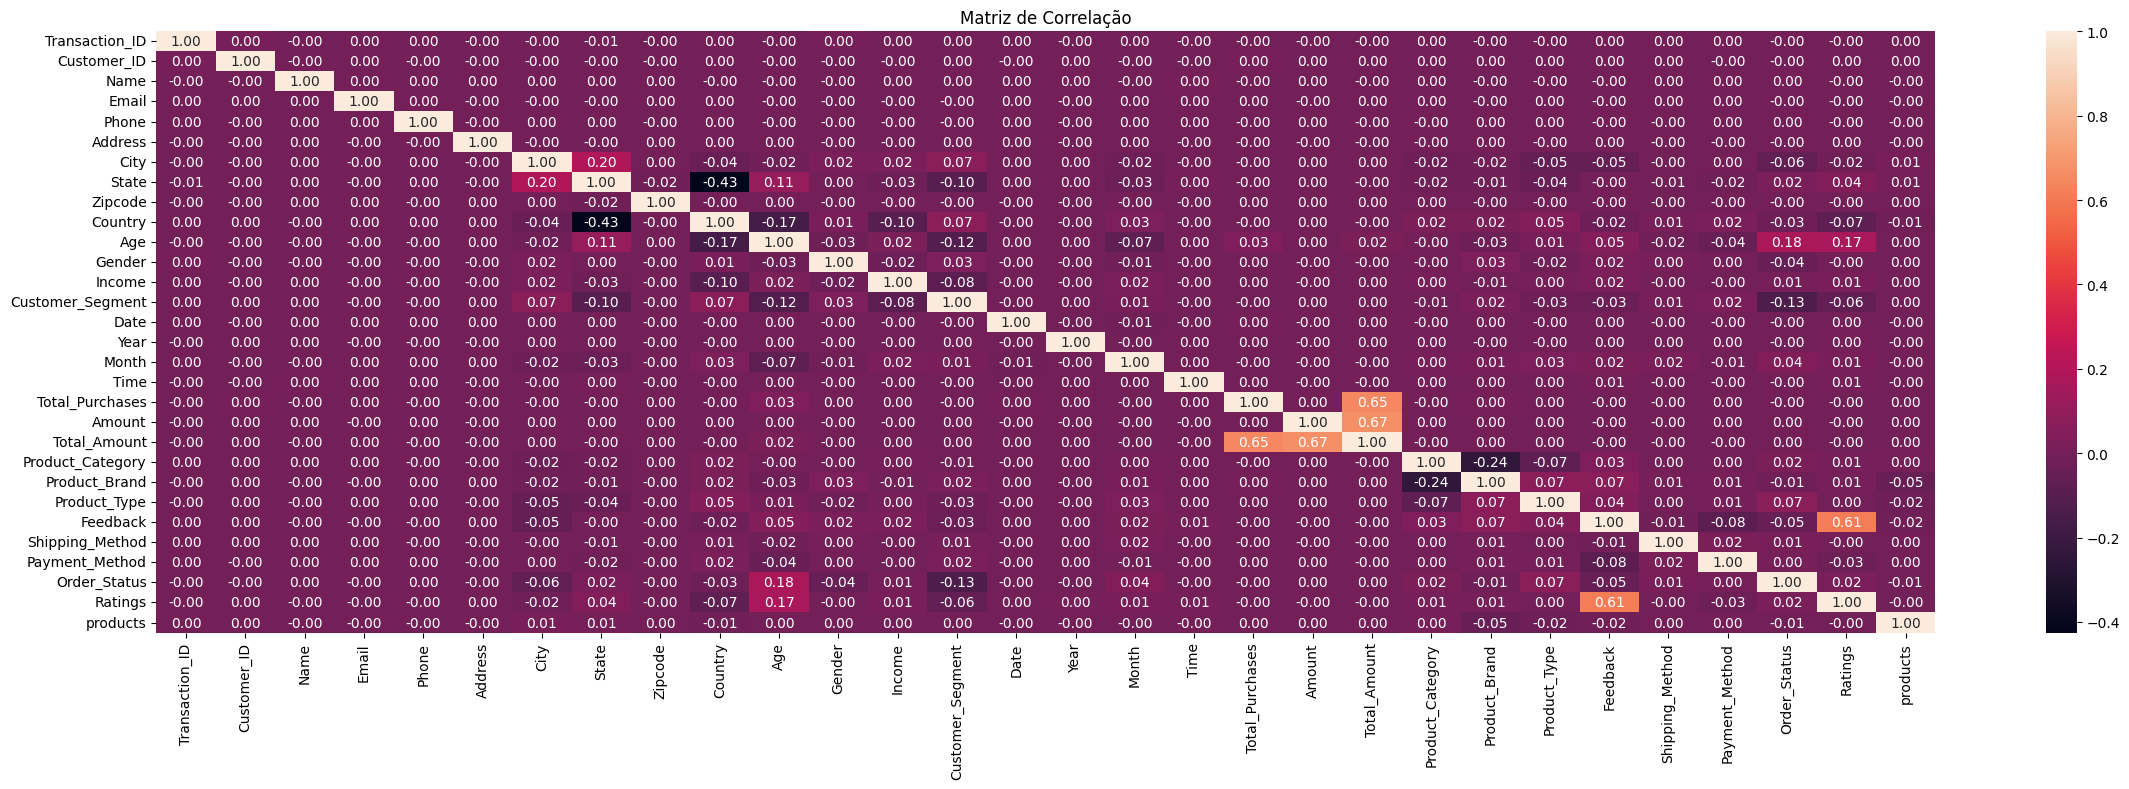

Feedback            1.00
Ratings             0.61
Product_Brand       0.07
Age                 0.05
Product_Type        0.04
Product_Category    0.03
Month               0.02
Gender              0.02
Income              0.02
Time                0.01
Year                0.00
Date                0.00
Address             0.00
Customer_ID         0.00
Transaction_ID      0.00
State              -0.00
Name               -0.00
Zipcode            -0.00
Amount             -0.00
Phone              -0.00
Total_Amount       -0.00
Total_Purchases    -0.00
Email              -0.00
Shipping_Method    -0.01
products           -0.02
Country            -0.02
Customer_Segment   -0.03
Order_Status       -0.05
City               -0.05
Payment_Method     -0.08
Name: Feedback, dtype: float64


In [352]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 8))
corr_matrix = base.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# Correlação específica com o preço de venda
corr_with_price = corr_matrix['Feedback'].sort_values(ascending=False)
print(corr_with_price)

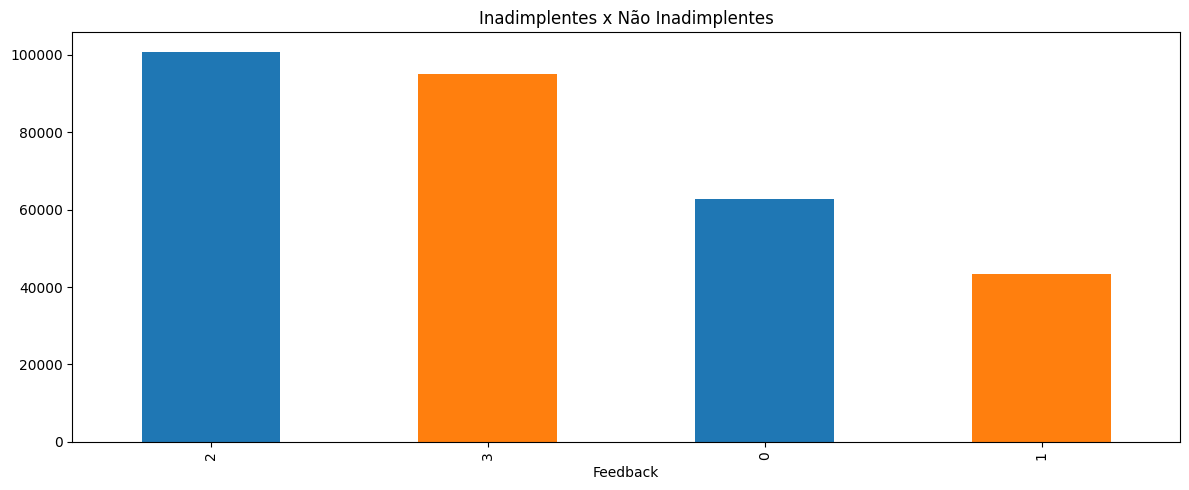

In [354]:
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
target.value_counts().plot(kind='bar', title='Inadimplentes x Não Inadimplentes',color = ['#1F77B4', '#FF7F0E']);

In [356]:
preditoras.shape

(301826, 11)

In [357]:
target.shape

(301826,)

In [355]:
from sklearn.model_selection import train_test_split
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.3, random_state = 40)

In [358]:
from sklearn.preprocessing import MinMaxScaler
# Vamos aplicar a normalização em treino e teste
# Padronização
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

## Usando o GridSearchCV

In [359]:
from sklearn.ensemble import RandomForestClassifier
# Construtor do Modelo
randomForest = RandomForestClassifier()

In [360]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import time

# Exemplo de dados - substitua com seus próprios dados
#X = np.random.rand(100, 5)  # 100 amostras, 5 características
#y = np.random.randint(0, 2, 100)  # 100 rótulos binários

# Dividindo os dados em conjunto de treinamento e teste
#X_train, X_test, y_train, y_test = train_test_split(preditoras, target, test_size=0.3, random_state=42)

# Normalizando os dados
#scaler = MinMaxScaler()
#X_train_normalized = scaler.fit_transform(X_treino)
#X_test_normalized = scaler.transform(X_teste)

# Valores para o grid de hiperparâmetros
n_estimators = np.array([100, 150, 300])
max_depth = np.array([10, 20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2"])
min_samples_split = np.array([2, 5])
min_samples_leaf = np.array([1, 2])
bootstrap = np.array([True, False]) 

# Grid de hiperparâmetros
grid_params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'criterion': criterion,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Criando o modelo com o Grid de Hiperparâmetros
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=grid_params, cv=3, n_jobs=-1, verbose=2)

# Treinando os modelos
start_time = time.time()
grid_search.fit(X_treino_normalizados, y_treino)
end_time = time.time()

# Obtendo e visualizando os parâmetros treinados
train_results = pd.DataFrame(grid_search.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {grid_search.best_score_:.2%}")
print("")
print(f"Hiperparâmetros Ideais: {grid_search.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(end_time - start_time, 2))
print("")
print("Número de treinamentos realizados: ", train_results.shape[0])


Fitting 3 folds for each of 192 candidates, totalling 576 fits
Acurácia em Treinamento: 88.46%

Hiperparâmetros Ideais: {'bootstrap': np.True_, 'criterion': np.str_('entropy'), 'max_depth': np.int64(20), 'max_features': np.str_('sqrt'), 'min_samples_leaf': np.int64(2), 'min_samples_split': np.int64(5), 'n_estimators': np.int64(150)}

Tempo de Treinamento do Modelo:  9754.32

Número de treinamentos realizados:  192


## Usando o RandomizedSearchCV

In [361]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import time

# Exemplo de dados - substitua com seus próprios dados
#X = np.random.rand(100, 5)  # 100 amostras, 5 características
#y = np.random.randint(0, 2, 100)  # 100 rótulos binários

# Dividindo os dados em conjunto de treinamento e teste
#X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando os dados
#scaler = MinMaxScaler()
#X_treino_normalizados = scaler.fit_transform(X_treino)
#X_teste_normalizados = scaler.transform(X_teste)

# Valores para o grid de hiperparâmetros
n_estimators = np.array([100, 150, 300])
max_depth = np.array([10, 20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2"])
min_samples_split = np.array([2, 5])  # Corrigido de [1,2] para [2, 5] (split mínimo deve ser pelo menos 2)
min_samples_leaf = np.array([1, 2])
bootstrap = np.array([True, False])  # Corrigido de ["True", "False"] para [True, False]

# Número de iterações do RandomizedSearch
iteracoes = 10

# Grid de hiperparâmetros
grid_parametros = dict(n_estimators=n_estimators,
                       max_depth=max_depth,
                       criterion=criterion,
                       max_features=max_features,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       bootstrap=bootstrap)

# Criando o modelo com o Grid de Hiperparâmetros
rf = RandomForestClassifier()
randomForest = RandomizedSearchCV(estimator=rf, param_distributions=grid_parametros, cv=3, n_jobs=-1, n_iter=iteracoes, verbose=2)

# Treinando os modelos
inicio = time.time()
randomForest.fit(X_treino_normalizados, y_treino)
fim = time.time()

# Obtendo e visualizando os parâmetros treinados
treinos_rf = pd.DataFrame(randomForest.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {randomForest.best_score_:.2%}")
print("")
print(f"Hiperparâmetros Ideais: {randomForest.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio, 2))
print("")
print("Número de treinamentos realizados: ", treinos_rf.shape[0])


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Acurácia em Treinamento: 88.45%

Hiperparâmetros Ideais: {'n_estimators': np.int64(300), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(2), 'max_features': np.str_('log2'), 'max_depth': np.int64(20), 'criterion': np.str_('gini'), 'bootstrap': np.True_}

Tempo de Treinamento do Modelo:  624.89

Número de treinamentos realizados:  10


## Utilizando o Baysian Search

In [362]:
# Instalação do Baysian_opt
!pip install bayesian-optimization


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [364]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from bayes_opt import BayesianOptimization, UtilityFunction
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Carregar um conjunto de dados de exemplo
#data = load_iris()
#X = data.data
#y = data.target

# Dividir os dados em conjuntos de treino e teste
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
#scaler = StandardScaler()
#X_train_normalized = scaler.fit_transform(X_train)
#X_test_normalized = scaler.transform(X_test)

# Defina a função de caixa preta para otimizar
def black_box_function(C):
 # C: hiperparâmetro SVC para otimizar
 model = SVC(C=C, probability=True) # Adicionando probability=True para calcular roc_auc_score
 model.fit(X_treino_normalizados, y_treino)
 y_score = model.predict_proba(X_teste_normalizados)[:, 1]
 f = roc_auc_score(y_teste, y_score, multi_class='ovr')
 return f

# Defina o intervalo de C para otimizar
pbounds = {"C": (0.1, 10)}

# Cria o otimizador e otimiza a função da caixa preta
optimizer = BayesianOptimization(f=black_box_function,
 pbounds=pbounds, verbose=2,
 random_state=4)
optimizer.maximize(init_points=5, n_iter=20)

print("Melhor Resultado: {}; f(x) = {}.". format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   |     C     |
-------------------------------------


AxisError: axis 1 is out of bounds for array of dimension 1

In [363]:
from sklearn.svm import SVC 
from sklearn.metrics import roc_auc_score 
from bayes_opt import BayesianOptimization, UtilityFunction 


# Defina a função de caixa preta para otimizar. 
def black_box_function(C): 
    # C: hiperparâmetro SVC para otimizar. 
    model = SVC(C = C) 
    model.fit(X_treino_normalizados, y_treino) 
    y_score = model.decision_function(X_teste_normalizados) 
    f = roc_auc_score(y_teste, y_score) 
    return f

# Defina o intervalo de C para otimizar. 
# bayes_opt requer que seja um dicionário. 
pbounds = {"C": [0.1, 10]}

# Cria o otimizados e otimiza a função da caixa preta
optimizer = BayesianOptimization(f = black_box_function,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
optimizer.maximize(init_points = 5, n_iter = 20)
print("Melhor Resultado: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   |     C     |
-------------------------------------


ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
#Importação e pré-visualização dos dados, com arquivo CSV
base_new = pd.read_csv("C:/Users/menez/OneDrive - Faculdade Impacta Tecnologia/IMPACTA 2024/ANO LETIVO 2024/MATÉRIAS/REAL DATA - DRIVEN BUSINESS PROJECT (HANDS-ON)/ecommerce/archive/new_retail_data.csv")
print(base_new.head())

In [320]:
base_new.groupby(['Feedback']).size()


Feedback
Average       62674
Bad           43299
Excellent    100755
Good          95098
dtype: int64

In [316]:
base_new = base_new[base_new['Feedback'] != 0]

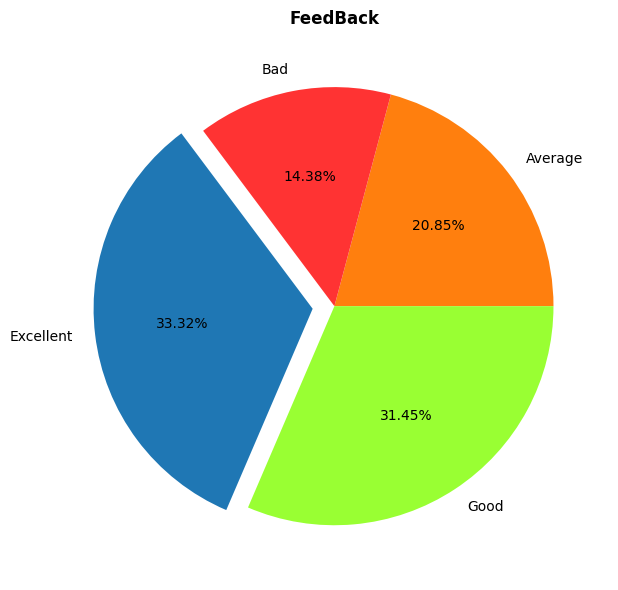

In [322]:
#Analisando FeedBack
color = ['#FF7F0E', '#FF3333', '#1F77B4', '#99FF33']
explode = (0, 0, 0.1, 0)

plt.figure(figsize=(10, 6))
base_new.groupby('Feedback')['Total_Amount'].sum().plot(kind='pie', autopct='%0.2f%%', colors=color, explode=explode)
plt.title('FeedBack' , fontweight='bold')
plt.ylabel('')
plt.xlabel('')
plt.show()

### Modelo Preditivo

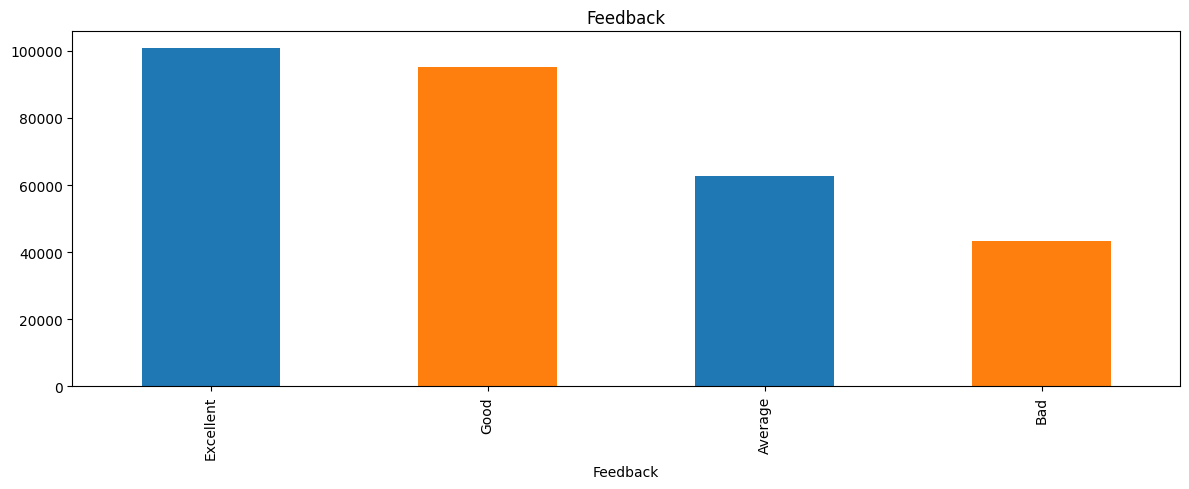

In [323]:
#Analisando como a variavel alvo está distribuida.
#Aqui podemos observar que há muito mais cotas como INADIMPLENTE
#dessa forma, precisaremos balancear o dataset mais adiante.
base_new.Feedback.value_counts().plot(kind='bar', title='Feedback',color = ['#1F77B4', '#FF7F0E']);

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supondo que 'base_inteiros' seja seu DataFrame
# Exemplo de DataFrame
# base_inteiros = pd.read_csv('seu_arquivo.csv')  # Substitua pelo seu método de leitura de dados

# Verifique se 'base_inteiros' é um DataFrame e contém a coluna 'Feedback'
if isinstance(base_new, pd.DataFrame) and 'Feedback' in base.columns:
    plt.figure(figsize=(24, 8))

    # Calculando a matriz de correlação
    corr_matrix = base_new.corr()

    # Gerando o heatmap de correlação
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Feedback Correlação')
    plt.show()

    # Exibindo a correlação específica com a coluna 'Feedback'
    corr_with_feedback = corr_matrix['Feedback'].sort_values(ascending=False)
    print(corr_with_feedback)
else:
    print("Certifique-se de que 'base_inteiros' é um DataFrame válido e contém a coluna 'Feedback'.")


ValueError: could not convert string to float: 'Excellent'

<Figure size 2400x800 with 0 Axes>

In [328]:
#carregar variaveis para plot
variaveis_numericas = []
for i in base_new.columns[0:30].tolist():
        if base_new.dtypes[i] == 'int64' or base_new.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i) 

In [329]:
#Visualizando as variáveis numéricas
variaveis_numericas

['Transaction_ID',
 'Customer_ID',
 'Name',
 'Email',
 'Phone',
 'Address',
 'City',
 'State',
 'Zipcode',
 'Country',
 'Age',
 'Gender',
 'Income',
 'Customer_Segment',
 'Date',
 'Year',
 'Month',
 'Time',
 'Total_Purchases',
 'Amount',
 'Total_Amount',
 'Product_Category',
 'Product_Brand',
 'Product_Type',
 'Shipping_Method',
 'Payment_Method',
 'Order_Status',
 'Ratings',
 'products']

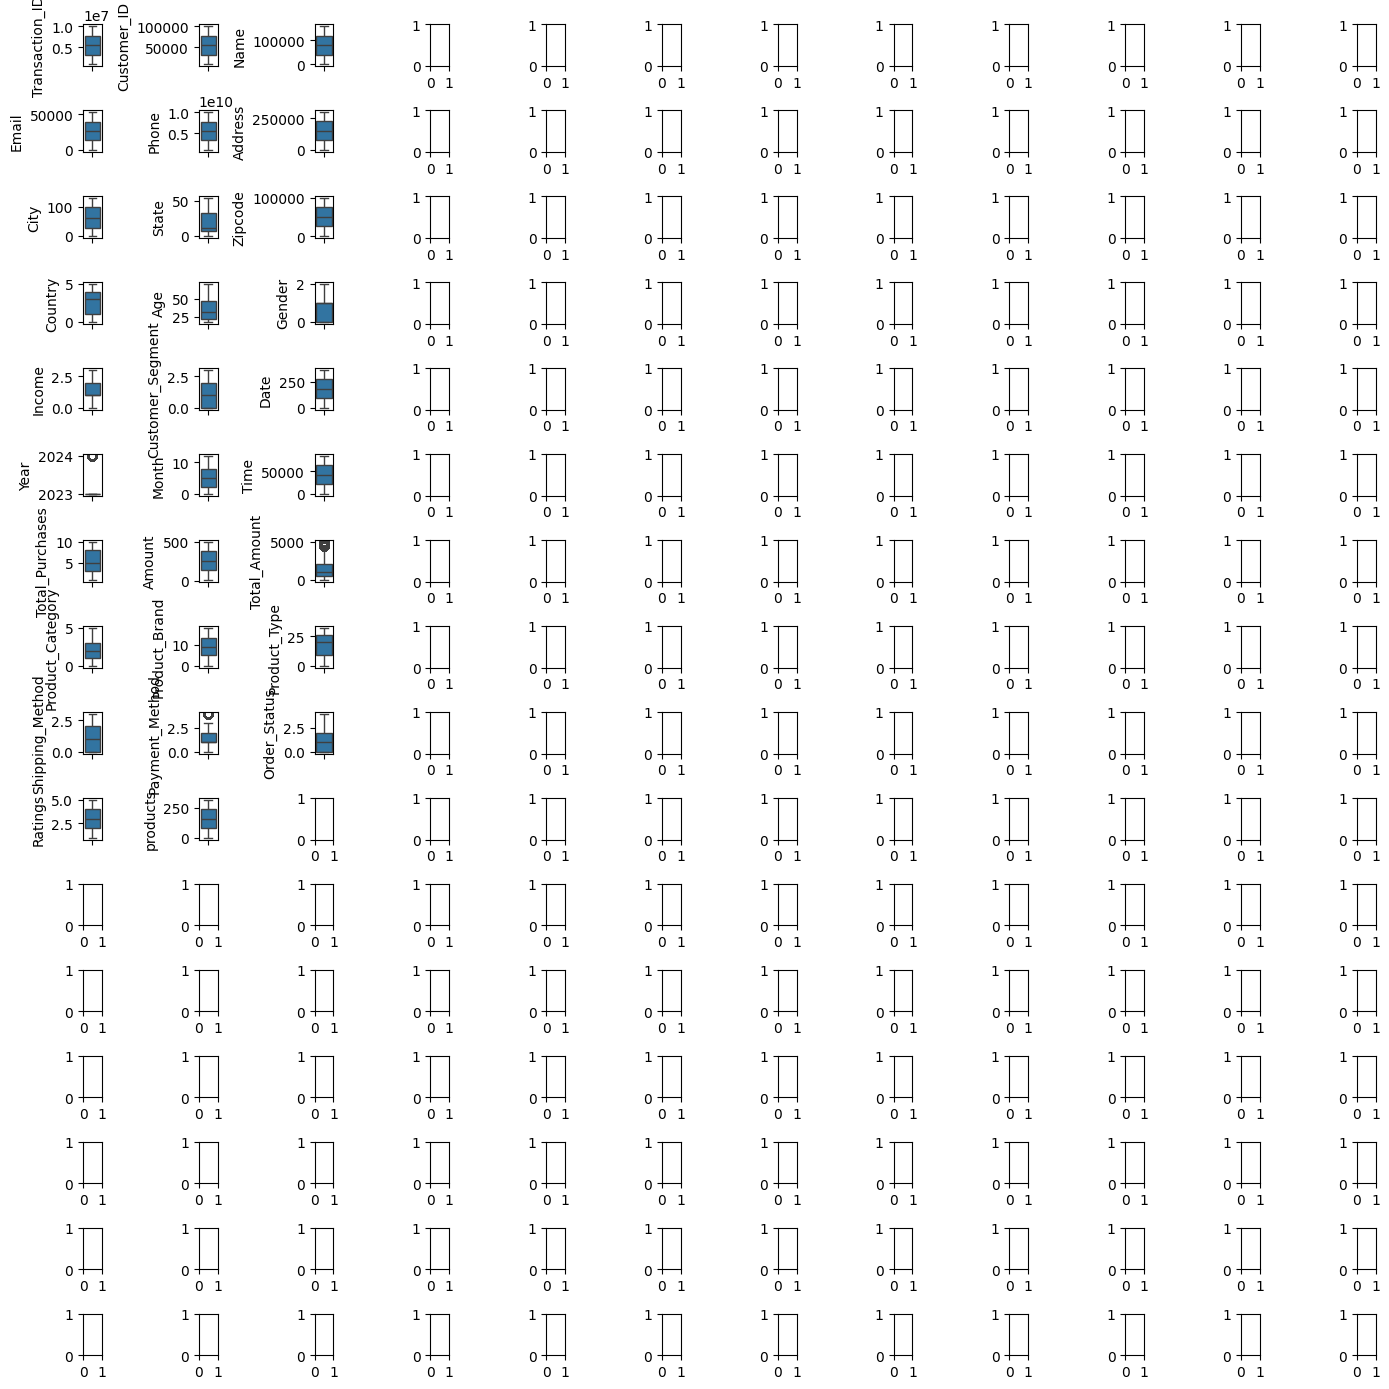

In [172]:
#Podemos observar nos boxplots abaixo que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(16, 12) #4 linhas e 3 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = base_new, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show()

In [178]:
# carregar variaveis categoricas para OneHotEncoding
# Colocamos o SLICE até 16 porque NÃO precisamos fazer OneHotEncoding para variavel TARGET
variaveis_categoricas = []
for i in base_new.columns[0:30].tolist():
        if base_new.dtypes[i] == 'object' or base_new.dtypes[i] == 'category':                        
            variaveis_categoricas.append(i) 

In [179]:
# Visualizando as variaveis categoricas
variaveis_categoricas

['Feedback']

In [236]:
# Visualiznado a quantidade da variavel target para balanceamento
variavel_target = base_new.Feedback.value_counts()
variavel_target

Feedback
Excellent    100755
Good          95098
Average       62674
Bad           43299
Name: count, dtype: int64

In [199]:
#Separar variaveis preditoras e target
PREDITORAS = base.iloc[:, 0:30]  
TARGET = base_new.iloc[:, 24] 

In [238]:
# Visualizando as variaveis preditoras
PREDITORAS.head()

,0,1,2,3,4
0,0.56,0.17,0.57,0.10,0.43
1,0.80,0.41,0.51,0.30,0.62
2,0.08,0.64,0.46,0.41,0.32
3,0.38,0.33,0.91,0.78,0.87
4,0.17,0.78,0.89,0.48,0.82


In [237]:
# Visualizando a variavel target
TARGET.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [204]:
pip install imblearn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.3 kB 320.0 kB/s eta 0:00:01
   ------------------------------ --------- 194.6/258.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [207]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Exemplo de dados - substitua com seus próprios dados
# PREDITORAS deve ser um DataFrame ou matriz de recursos (features)
# TARGET deve ser uma série ou matriz de rótulos (labels)
PREDITORAS = np.random.rand(100, 5)  # 100 amostras, 5 características
TARGET = np.random.randint(0, 2, 100)  # 100 rótulos binários

# Cria o balanceador SMOTE
balanceador = SMOTE(random_state=seed)

# Aplica o balanceador
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS, TARGET)

# Exibir as formas dos novos conjuntos de dados balanceados
print("Forma das PREDITORAS originais:", PREDITORAS.shape)
print("Forma das TARGET originais:", TARGET.shape)
print("Forma das PREDITORAS balanceadas:", PREDITORAS_RES.shape)
print("Forma das TARGET balanceadas:", TARGET_RES.shape)


Forma das PREDITORAS originais: (100, 5)
Forma das TARGET originais: (100,)
Forma das PREDITORAS balanceadas: (100, 5)
Forma das TARGET balanceadas: (100,)


In [208]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
balanceador = SMOTE(random_state = seed)

# Aplica o balanceador
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS, TARGET)

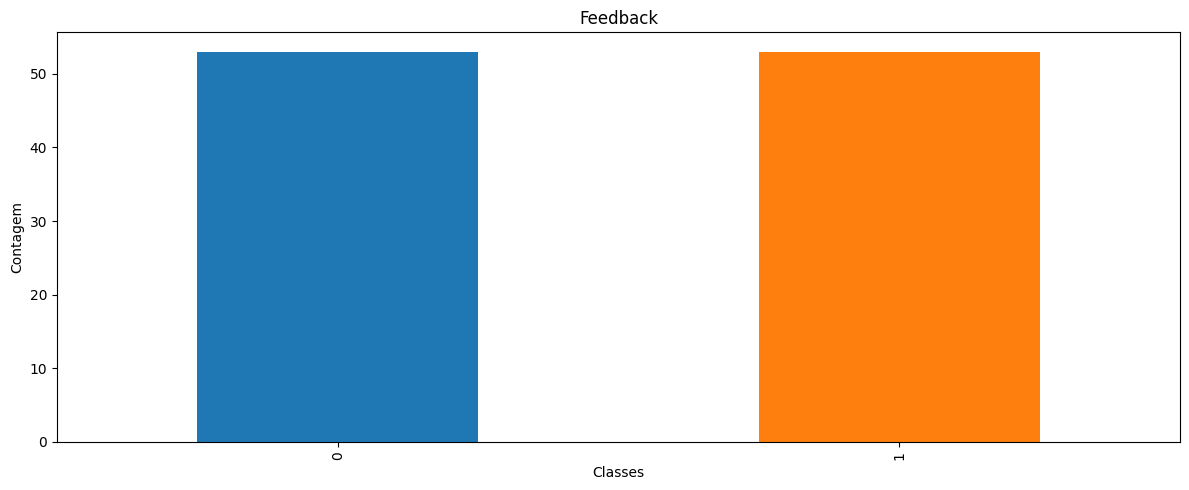

In [214]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Exemplo de dados - substitua com seus próprios dados
# PREDITORAS deve ser um DataFrame ou matriz de recursos (features)
# TARGET deve ser uma série ou matriz de rótulos (labels)
PREDITORAS = np.random.rand(100, 5)  # 100 amostras, 5 características
TARGET = np.random.randint(0, 2, 100)  # 100 rótulos binários

# Cria o balanceador SMOTE
balanceador = SMOTE(random_state=seed)

# Aplica o balanceador
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS, TARGET)

# Convertendo TARGET_RES para uma pandas Series
TARGET_RES_series = pd.Series(TARGET_RES)

# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
TARGET_RES_series.value_counts().plot(kind='bar', title='Feedback', color=['#1F77B4', '#FF7F0E'])
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()


In [217]:
PREDITORAS.shape

(100, 5)

In [233]:
PREDITORAS = pd.DataFrame(PREDITORAS)
PREDITORAS

,0,1,2,3,4
0,0.56,0.17,0.57,0.10,0.43
1,0.80,0.41,0.51,0.30,0.62
2,0.08,0.64,0.46,0.41,0.32
3,0.38,0.33,0.91,0.78,0.87
4,0.17,0.78,0.89,0.48,0.82
5,0.93,0.84,0.28,0.11,0.56
6,0.18,0.57,0.53,0.15,0.51
7,0.05,0.20,0.77,0.96,0.89
8,0.76,0.91,0.88,0.52,0.03
9,0.42,0.23,0.39,0.40,0.62


In [218]:
TARGET.shape

(100,)

In [219]:
PREDITORAS_RES.shape

(106, 5)

In [220]:
TARGET_RES.shape

(106,)

In [221]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, Y_treino, Y_teste = train_test_split(PREDITORAS_RES, TARGET_RES, test_size = 0.3, random_state = 42)

In [222]:
# Normalizando as Variáveis - Pré Processamento dos Dados
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados = Normalizador.transform(X_teste)

In [223]:
X_treino_normalizados.shape

(74, 5)

In [224]:
X_treino_normalizados

array([[0.67256557, 0.36289049, 0.35420734, 0.61540799, 0.84343605],
       [0.43027773, 0.60500125, 0.59853121, 0.89134228, 0.80180343],
       [0.80673368, 0.44632606, 0.        , 0.05976746, 0.06566199],
       [0.56211406, 0.21546725, 0.3410883 , 0.38428955, 0.55283721],
       [0.66382136, 0.95155766, 0.87246613, 0.07854139, 0.72554343],
       [0.80602714, 0.63115304, 0.18275802, 0.70226673, 0.11588597],
       [0.62197126, 0.9803163 , 0.83622951, 0.42506612, 0.87943366],
       [0.75248624, 0.0365462 , 1.        , 0.25082426, 0.93355872],
       [1.        , 0.29534545, 0.9051741 , 0.8611472 , 0.07405677],
       [0.54177738, 0.32993202, 0.9475969 , 0.74568831, 0.47196328],
       [0.70770627, 0.80738164, 0.89968979, 0.87129838, 0.18896913],
       [0.68986807, 0.78357078, 0.60457489, 0.14123699, 0.05078904],
       [0.13765286, 0.36907464, 0.09244073, 0.28111587, 0.8504839 ],
       [0.24162063, 0.55844574, 0.56164054, 0.83392331, 0.97295982],
       [0.78646613, 0.42178118, 0.

In [225]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators  = 300)

# Construção do modelo
clf = clf.fit(X_treino_normalizados, Y_treino)

In [226]:
# Verificando a acuracia do modelo com dados de teste
scores = clf.score(X_teste_normalizados,Y_teste)
scores

0.3125

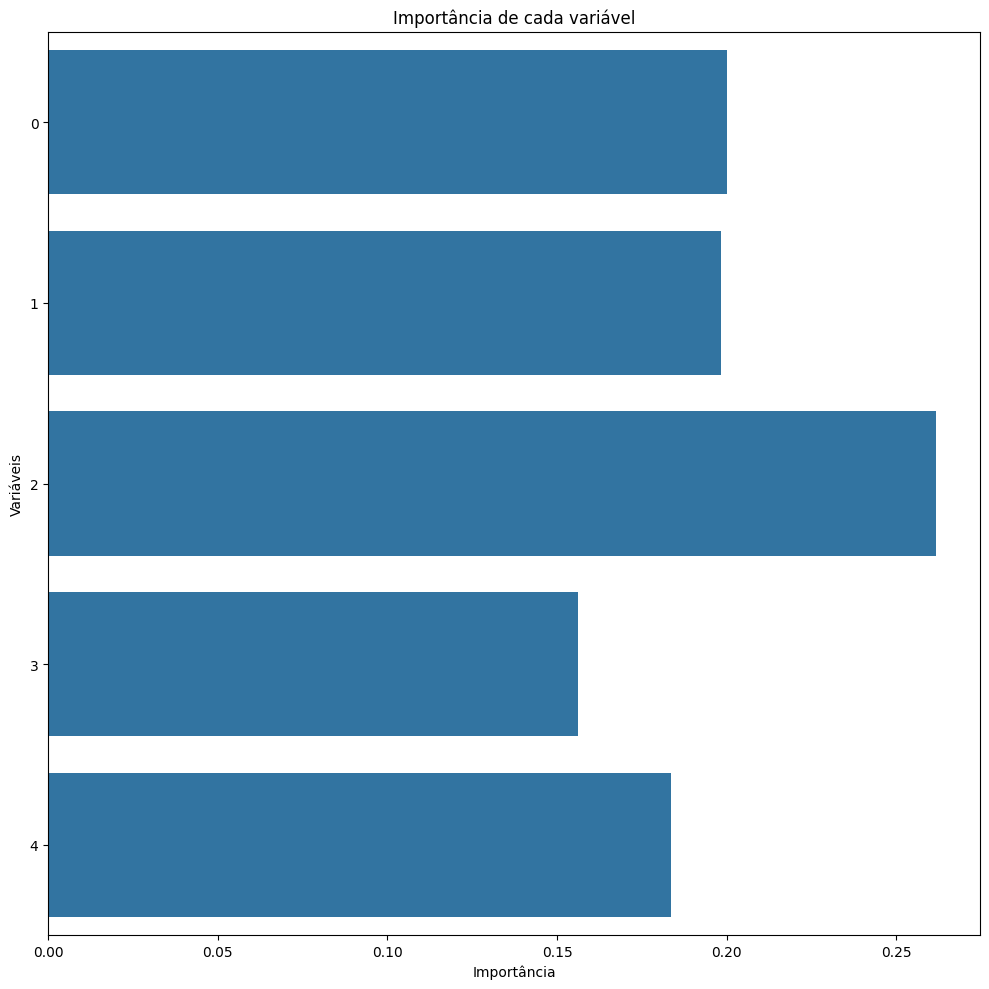

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Exibindo a importância de cada variável no modelo preditivo
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=PREDITORAS.columns)
importances = importances.sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()
